In [314]:
#importing necessary librarires
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import power_transform
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
import joblib
%matplotlib inline
warnings.filterwarnings('ignore')


In [57]:
#import csv file
df=pd.read_csv('winequality-red.csv')

In [58]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
df.shape

(1599, 12)

In [60]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [61]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


there might be outliers prensent in residual sugar,chlorides,free sulfur dioxide and the column free sulfur dioxide might be skwed

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


all the columns are of either float or int so no need of any encoding

In [63]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

there are no null values present in the dataset

In [64]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

We see that tis dataset is of classification type with  6 categories.Now we shall convert it into Binary classification by converting with . 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [65]:
df['quality'] = df['quality'].map({3 : 0, 4 :0, 5:0,
                                      6: 0, 7: 1, 8: 1})

7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [66]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

We see that the dataset is imbalanced because there are more 0's than 1's.We willuse SMOTE technique to balance the dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

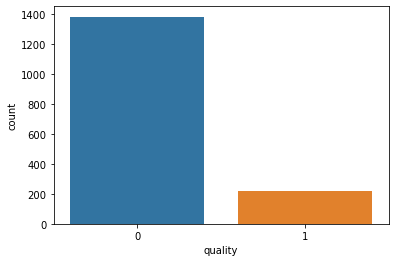

In [67]:
sns.countplot(df['quality'])

We see that the dataset is imbalanced because there are more 0's than 1's.This imbalance in data is to be rectified

# Exploratory data Analysis

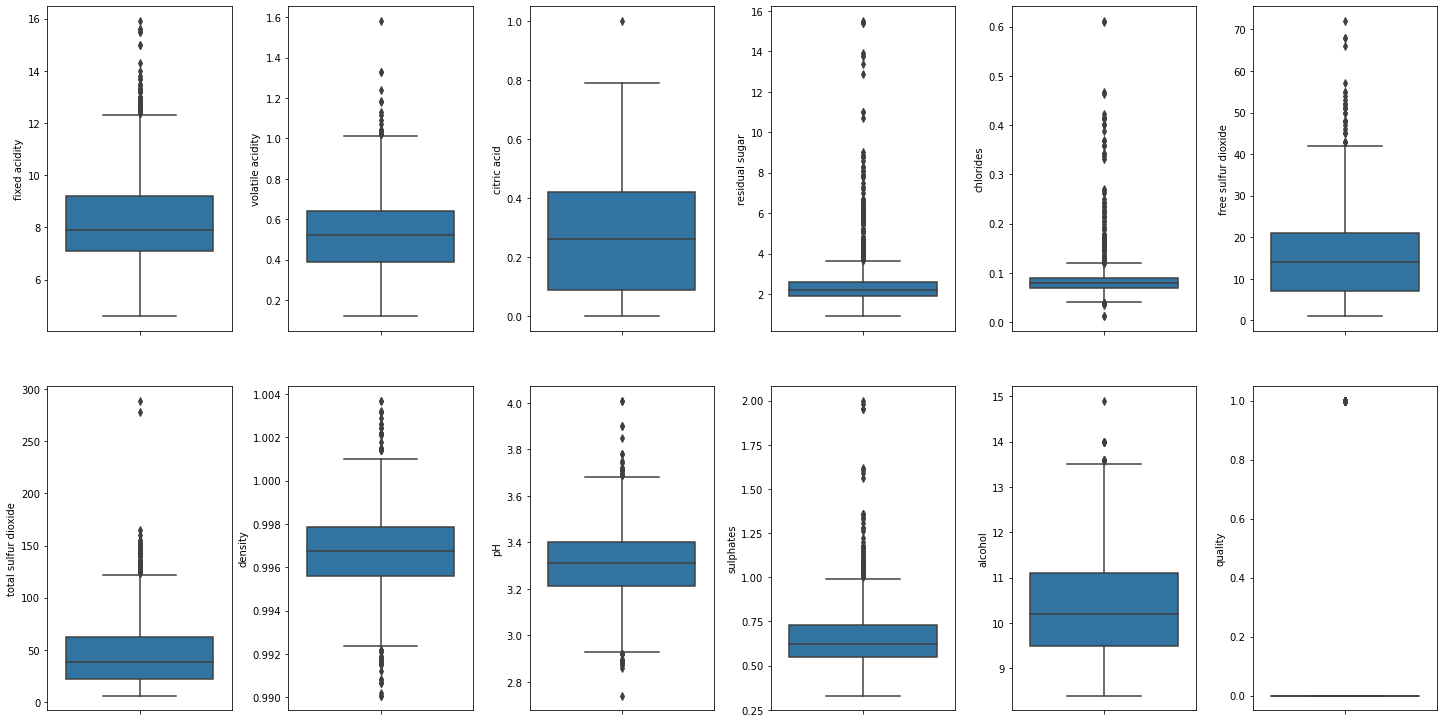

In [98]:
#create box plot
fig, ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)



We can see that outliers are present in every column and need to be removed

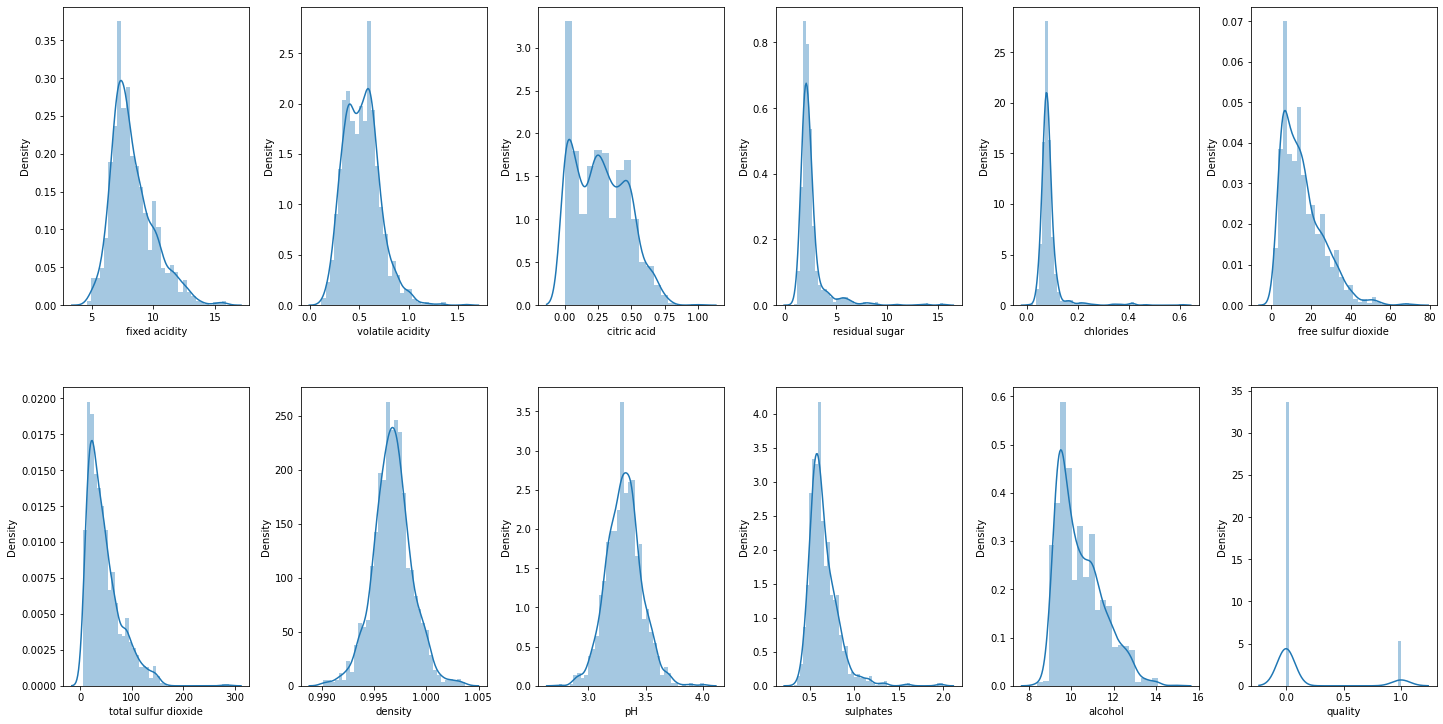

In [103]:
#create dist plot
fig, ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
        sns.distplot(value,ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


We see that many of columns are skkewed and need to be rectified

In [105]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

We can see that high skewness is present in most of the columns

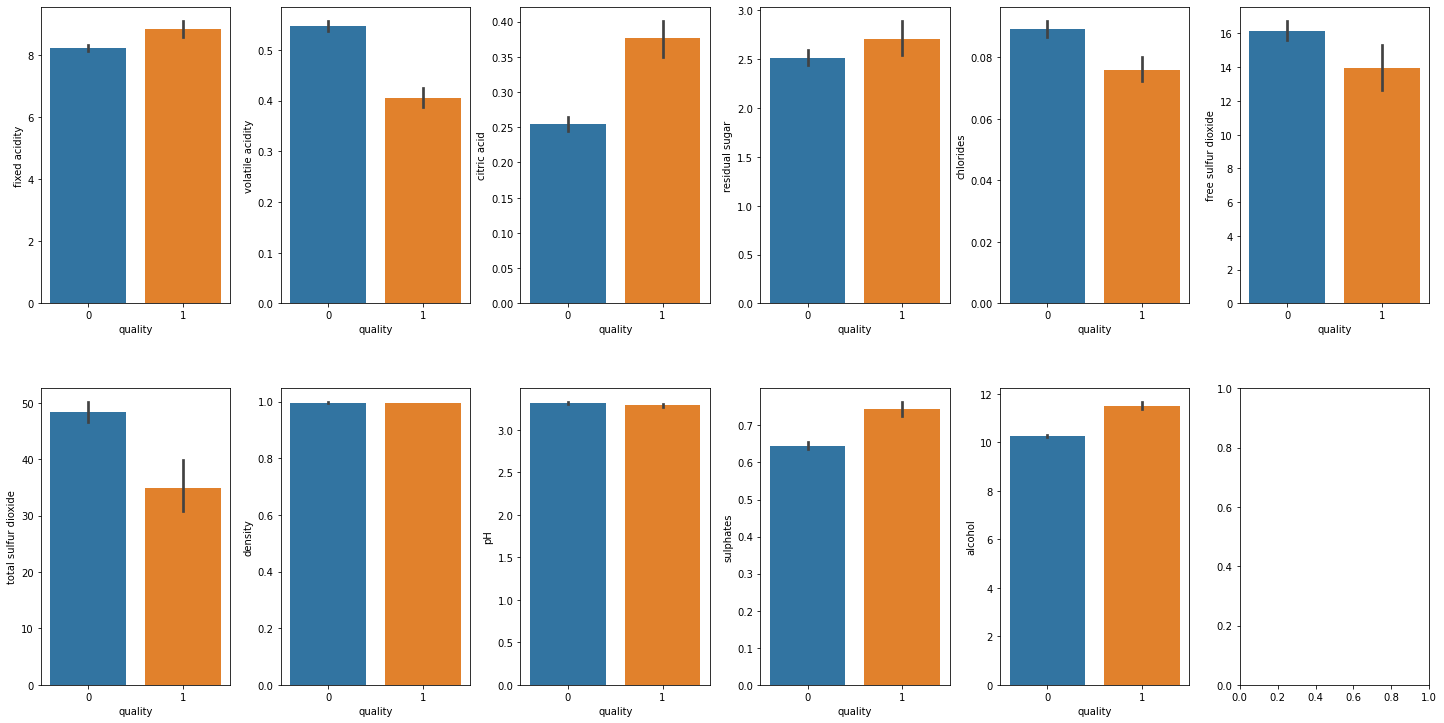

In [107]:
#bivariate analysis
fig, ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
        if col != 'quality':
            sns.barplot(df['quality'],df[col],ax=ax[index])
            index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


# Checking Correlation

In [108]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


<AxesSubplot:>

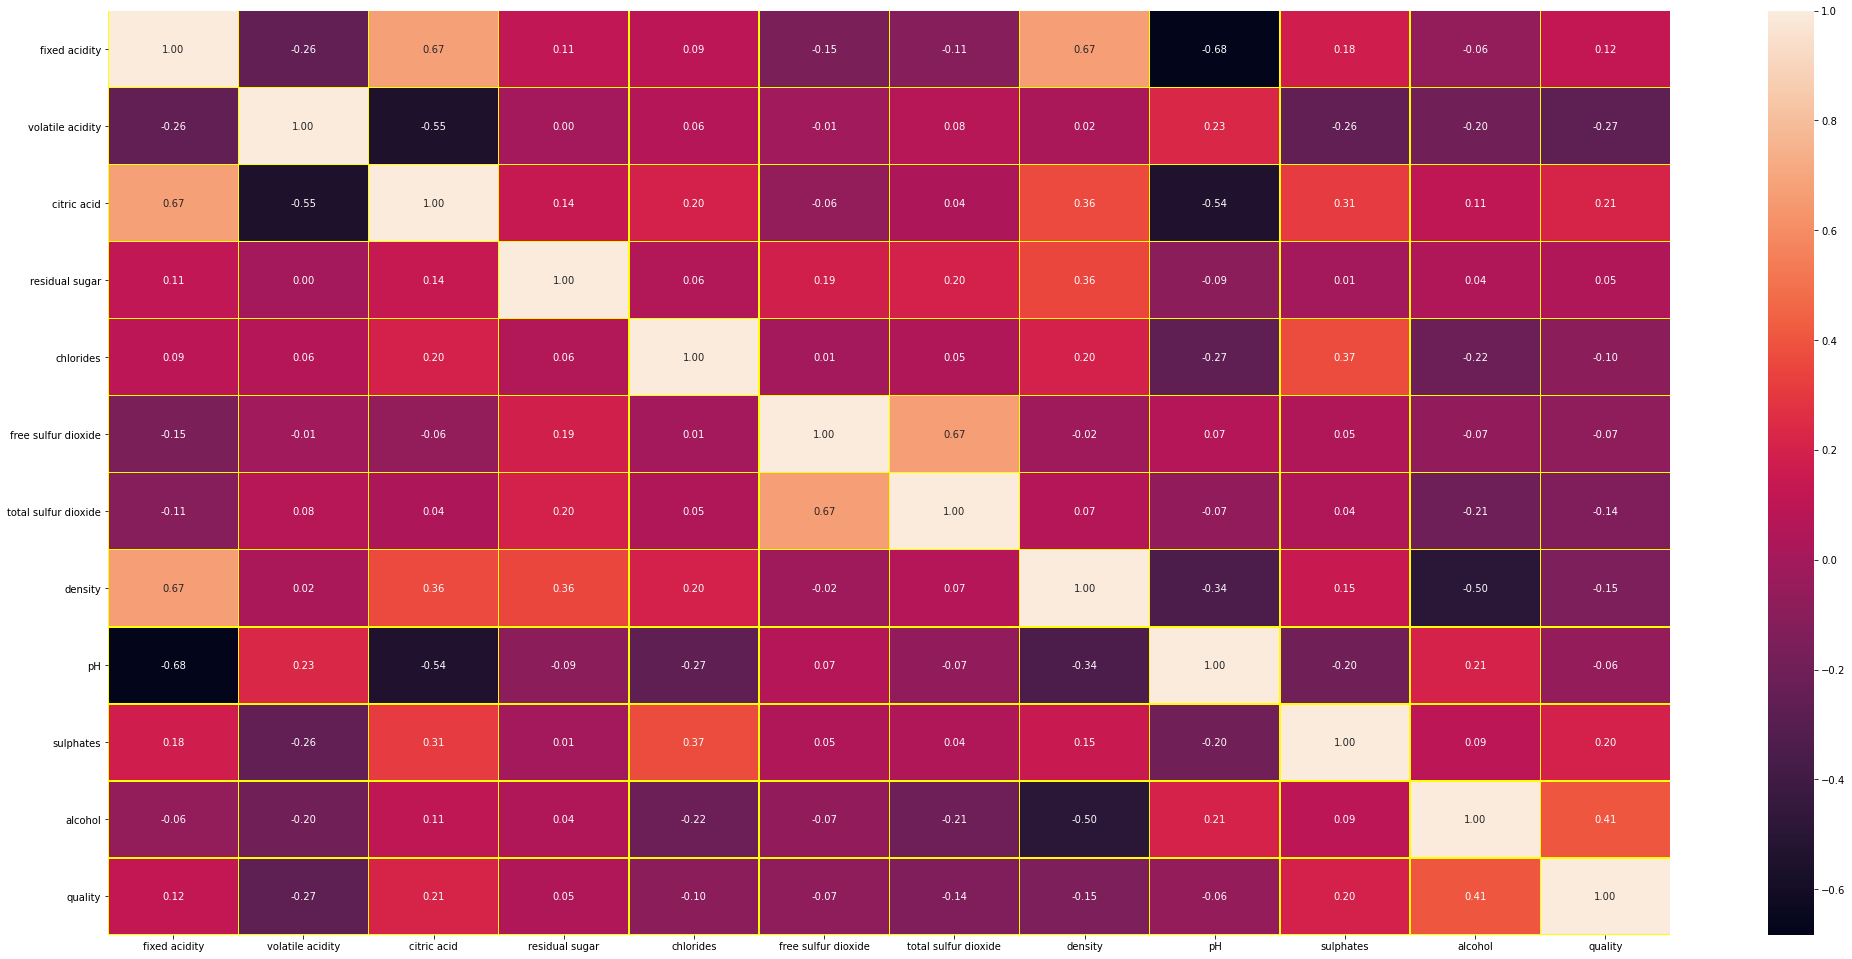

In [109]:
plt.figure(figsize=(35,17))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

# Data Pre Processing

In [305]:
#input split
X = df.drop(columns=['quality'])
y = df['quality']

In [306]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

we see that the dataset is imbalanced now we are going to balance it

In [307]:
#Treating data imbalance
smt=SMOTE()

In [308]:
x,y=smt.fit_resample(X,y)

In [226]:
y.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

Now  dataset is balanced

# Removing Skewness

In [227]:
x.skew()

fixed acidity           0.698922
volatile acidity        0.936558
citric acid            -0.026581
residual sugar          4.118276
chlorides               6.441981
free sulfur dioxide     1.331631
total sulfur dioxide    2.017400
density                 0.159782
pH                      0.318983
sulphates               1.654156
alcohol                 0.225746
dtype: float64

we see very high skewness present in the data

In [228]:
x_new=power_transform(x,method='yeo-johnson')

In [229]:
x=pd.DataFrame(x_new,columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.582226,1.313671,-1.669065,-0.709721,-0.016027,-0.123851,0.118079,0.721850,1.386825,-0.963605,-1.395134
1,-0.321186,1.957932,-1.669065,0.493364,0.960293,1.109560,1.056209,0.221920,-0.678763,0.029015,-0.983516
2,-0.321186,1.549499,-1.456349,0.072324,0.729948,0.340743,0.763954,0.323125,-0.250432,-0.196936,-0.983516
3,1.429188,-1.313424,1.266266,-0.709721,-0.069966,0.529005,0.907429,0.820616,-0.972662,-0.780664,-0.983516
4,-0.582226,1.313671,-1.669065,-0.709721,-0.016027,-0.123851,0.118079,0.721850,1.386825,-0.963605,-1.395134
...,...,...,...,...,...,...,...,...,...,...,...
2759,-0.005609,-0.613155,-0.339655,-0.167678,-0.652526,0.125941,-0.229791,-0.877925,0.053886,0.825967,0.924801
2760,0.215522,0.439731,-1.191211,0.365198,0.689174,0.773697,0.630426,0.621864,0.298414,1.142957,-0.218531
2761,0.097940,-0.550666,0.550559,-0.693944,0.031110,-1.012825,-1.415051,-0.819397,0.149947,-0.081432,0.923196
2762,-2.372018,0.275448,-0.882907,-0.194445,-2.254154,0.437785,1.524609,-2.241148,1.302142,1.217799,1.859550


In [230]:
x.skew().sort_values()

chlorides              -0.192533
citric acid            -0.042619
sulphates              -0.025107
pH                     -0.010244
residual sugar         -0.007168
fixed acidity           0.000151
free sulfur dioxide     0.007788
alcohol                 0.009980
density                 0.013549
total sulfur dioxide    0.017796
volatile acidity        0.025941
dtype: float64

we see that the skewness is removed now

# Treating Outliers

In [231]:
z=np.abs(zscore(x))

In [232]:
print(np.where(z>3))

(array([   7,   13,   17,   19,   42,   45,   81,   83,   86,   91,   92,
         95,  106,  151,  151,  151,  151,  169,  169,  170,  181,  198,
        226,  226,  240,  258,  281,  291,  440,  442,  451,  469,  530,
        535,  544,  554,  555,  557,  614,  650,  652,  656,  692,  695,
        695,  723,  730,  754,  773,  836,  836,  837,  837,  889,  909,
        914,  948,  949,  950, 1017, 1017, 1017, 1018, 1018, 1018, 1051,
       1114, 1165, 1260, 1287, 1299, 1316, 1316, 1319, 1319, 1321, 1321,
       1369, 1370, 1372, 1374, 1374, 1434, 1435, 1470, 1601, 1617, 1644,
       1648, 1648, 1673, 1690, 1712, 1760, 1820, 1835, 1887, 2034, 2081,
       2179, 2195, 2229, 2276, 2326, 2431, 2434, 2446, 2504, 2611, 2613,
       2663, 2686], dtype=int64), array([3, 9, 4, 4, 4, 8, 4, 4, 9, 9, 9, 8, 4, 2, 4, 8, 9, 4, 9, 9, 4, 3,
       4, 9, 4, 4, 4, 4, 8, 7, 4, 3, 5, 5, 8, 7, 7, 7, 8, 8, 0, 8, 4, 4,
       8, 9, 4, 4, 5, 4, 7, 4, 7, 7, 3, 3, 1, 1, 1, 3, 7, 8, 3, 7, 8, 4,
       7, 4, 4, 

In [238]:
len(np.where(z>3)[0])

112

In [234]:
for i in set(np.where(z>3)[0]):
    x.drop(i,axis=0,inplace=True)
    y.drop(i,axis=0,inplace=True)

In [242]:
x.shape

(2669, 11)

In [243]:
# percentage data lost
print((2764-2669)*100/2764)

3.4370477568740956


# LogisticRegression

In [248]:
#splitting the dataframe
maxAccu=0
maxRS=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("the max acc is ",maxAccu," at rs ",maxRS)
    

NameError: name 'maxAcc' is not defined

In [249]:
print("the max acc is ",maxAccu," at rs ",maxRS)

the max acc is  0.8820224719101124  at rs  424


In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=424)

In [251]:
lr=LogisticRegression()

In [252]:
lr.fit(x_train,y_train)

LogisticRegression()

In [255]:
pred_test=lr.predict(x_test)

In [256]:
accuracy_score(y_test,pred_test)

0.8820224719101124

In [260]:
print(confusion_matrix(y_test,pred_test))

[[225  32]
 [ 31 246]]


In [261]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       257
           1       0.88      0.89      0.89       277

    accuracy                           0.88       534
   macro avg       0.88      0.88      0.88       534
weighted avg       0.88      0.88      0.88       534



# Decision Tree Classifier

In [263]:
dt=DecisionTreeClassifier()

In [264]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [266]:
pred_test=dt.predict(x_test)

In [267]:
accuracy_score(y_test,pred_test)

0.9232209737827716

In [ ]:
print(confusion_matrix(y_test,pred_test))

In [ ]:
print(classification_report(y_test,pred_test))

# Random Forest Classifier

In [269]:
rfc=RandomForestClassifier()

In [270]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [273]:
pred_test=rfc.predict(x_test)

In [274]:
accuracy_score(y_test,pred_test)

0.951310861423221

In [275]:
print(confusion_matrix(y_test,pred_test))

[[242  15]
 [ 11 266]]


In [276]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       257
           1       0.95      0.96      0.95       277

    accuracy                           0.95       534
   macro avg       0.95      0.95      0.95       534
weighted avg       0.95      0.95      0.95       534



# Support Vector Classifier

In [278]:
svc=SVC()

In [280]:
svc.fit(x_train,y_train)

SVC()

In [281]:
pred_test=svc.predict(x_test)

In [282]:
accuracy_score(y_test,pred_test)

0.9063670411985019

# Cross Validation Score

In [287]:
scr=cross_val_score(lr,x,y,cv=5)
print("the cross validation score for logistic regression is",scr.mean())

the cross validation score for logistic regression is 0.8205310903584403


In [289]:
scr2=cross_val_score(dt,x,y,cv=5)
print("the cross validation score for decision tree classifier is",scr2.mean())

the cross validation score for logistic regression is 0.8703613916000871


In [290]:
scr3=cross_val_score(rfc,x,y,cv=5)
print("the cross validation score for random forest classifier is",scr3.mean())

the cross validation score for random forest classifier is 0.9063361229982222


In [291]:
scr4=cross_val_score(svc,x,y,cv=5)
print("the cross validation score for support vector classifier is",scr4.mean())

the cross validation score for support vector classifier is 0.871863735059131


# HyperParameter tuning

In [297]:
param_grid={
               
               'max_features': ['auto','sqrt','log2'],
               
               
                'max_depth':[6,7,8,50],'criterion':['gini','entropy']}

In [298]:
GCV=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='accuracy')

In [299]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=424)

In [300]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 50],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [309]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto'}

In [303]:
pred_y=GCV.best_estimator_.predict(x_test)

In [312]:
print(confusion_matrix(y_test,pred_y))

[[240  17]
 [  8 269]]


In [304]:
accuracy_score(y_test,pred_y)

0.9531835205992509

# AOC ROC Curve

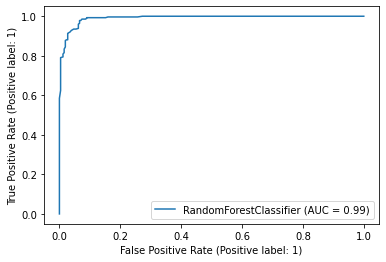

In [311]:
plot_roc_curve(GCV.best_estimator_,x_test,y_test)

Final Accuracy Score is 95% and Good AUC roc score of 99%

In [315]:
#Saving the model
joblib.dump(GCV.best_estimator_,"RedWineQualityModel.pkl")

['RedWineQualityModel.pkl']